In [3]:
import tensorflow as tf
import pandas as pd


Init Plugin
Init Graph Optimizer
Init Kernel


In [4]:
from tensorflow.python.client import device_lib
print(f"Running TensorFlow {tf.__version__} with {len(tf.config.list_physical_devices('GPU'))} GPUs recognized")
device_lib.list_local_devices()

Running TensorFlow 2.5.0 with 1 GPUs recognized
Metal device set to: Apple M1


2021-10-29 17:43:50.358073: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-29 17:43:50.358322: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13404502464752698158,
 name: "/device:GPU:0"
 device_type: "GPU"
 locality {
   bus_id: 1
 }
 incarnation: 17081089486124715754
 physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"]

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import sys, os

len(labels) :  57453
11730
14797
13538
11708
2161
3519
len(images) :  57453


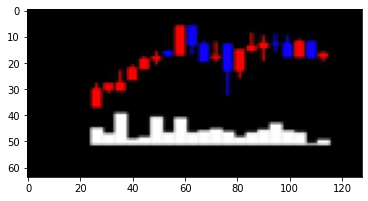

In [6]:
# Data load
sys.setrecursionlimit(100000)

tickers = ["BTC", "ETH","ADA", "XRP", "DOGE", "DOT"]
labels = pd.DataFrame()
images_len = []
for ticker in tickers:
    lable_path = f"/Users/ubinyou/Documents/Task/Upbit-MachineLearning-AutomaticProgram/Model/data/({ticker})minut5_20c3s/labels.xlsx"
    labels_sub = pd.read_excel(lable_path)
    images_len.append(len(labels_sub))
    labels = pd.concat([labels, labels_sub])
print("len(labels) : ",len(labels))

images = []
for ticker in tickers:
    ln = images_len.pop(0)
    print(ln)
    for i in range(ln):
        image_path = f"/Users/ubinyou/Documents/Task/Upbit-MachineLearning-AutomaticProgram/Model/data/({ticker})minut5_20c3s/{i}.jpg"
        image = Image.open(image_path)
        image = Image.Image.resize(image,(128,64))
        images.append(np.array(image)/255)
print("len(images) : ",len(images))
plt.imshow(image)
plt.show()



In [7]:
images = np.array(images)
labels = np.array(labels).reshape(-1,)
print(images.shape)
print(labels.shape)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1)
print(X_train.shape, " ", y_train.shape)

(57453, 64, 128, 3)
(57453,)
(45962, 64, 128, 3)   (45962,)


In [8]:
# Model build and train.

model = Sequential([
    # layers.experimental.preprocessing.Rescaling(input_shape=(250, 450, 3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
#     layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

path = "/Users/ubinyou/Documents/Task/Upbit-MachineLearning-AutomaticProgram/Model/minut5_20c3s/2/myModel.h5"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,
#                                    save_weights_only=True,
#                                    verbose=1,
#                                    period=3)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['acc'])

model.fit(X_train, 
          y_train,
#           batch_size=20,
          epochs=15)

model.save(path)

2021-10-29 17:45:41.435347: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-29 17:45:41.435388: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-10-29 17:45:49.398848: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-29 17:45:49.399758: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/ubinyou/miniforge3/envs/Upbit-MachineLearning-AutomaticProgram/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but th

Epoch 1/15


2021-10-29 17:45:49.676594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1437/1437 [==============================] - 25s 17ms/step - loss: 0.6921 - acc: 0.5175
Epoch 2/15
1437/1437 [==============================] - 25s 18ms/step - loss: 0.6885 - acc: 0.5420
Epoch 3/15
1437/1437 [==============================] - 25s 17ms/step - loss: 0.6846 - acc: 0.5530
Epoch 4/15
1437/1437 [==============================] - 25s 17ms/step - loss: 0.6799 - acc: 0.5610
Epoch 5/15
1437/1437 [==============================] - 26s 18ms/step - loss: 0.6727 - acc: 0.5777
Epoch 6/15
1437/1437 [==============================] - 27s 19ms/step - loss: 0.6615 - acc: 0.5979
Epoch 7/15
1437/1437 [==============================] - 30s 21ms/step - loss: 0.6448 - acc: 0.6226
Epoch 8/15
1437/1437 [==============================] - 26s 18ms/step - loss: 0.6196 - acc: 0.6520
Epoch 9/15
1437/1437 [==============================] - 26s 18ms/step - loss: 0.5870 - acc: 0.6824
Epoch 10/15
1437/1437 [==============================] - 26s 18ms/step - loss: 0.5472 - acc: 0.7157
Epoch 11/15
1437/143

In [9]:
model.evaluate(images,  labels, verbose=1)

   6/1796 [..............................] - ETA: 24s - loss: 0.4562 - acc: 0.8542  

2021-10-29 17:52:35.291979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1796/1796 [==============================] - 18s 9ms/step - loss: 0.4627 - acc: 0.8268


[0.4626690745353699, 0.8267627358436584]

In [10]:
model.predict(images[:30])

2021-10-29 17:52:52.546084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[2.5973344e-04],
       [7.8212816e-01],
       [9.9920732e-01],
       [9.9901462e-01],
       [9.9999094e-01],
       [9.9756658e-01],
       [9.8864567e-01],
       [1.1528455e-02],
       [7.5804138e-01],
       [8.7658477e-01],
       [9.9829859e-01],
       [8.8757086e-01],
       [8.9509860e-02],
       [9.5805371e-01],
       [7.5956738e-01],
       [9.2582220e-01],
       [7.1536936e-03],
       [2.8101290e-02],
       [8.9193475e-01],
       [9.9977273e-01],
       [9.9892437e-01],
       [1.3806485e-01],
       [2.3584621e-01],
       [8.4723383e-01],
       [9.9646097e-01],
       [9.9932837e-01],
       [9.9216509e-01],
       [9.5384324e-01],
       [2.2088768e-01],
       [8.5780501e-01]], dtype=float32)

In [3]:
import tensorflow.keras as keras
model_path = "/Users/ubinyou/Documents/Task/Upbit-MachineLearning-AutomaticProgram/Model/minut5_20c3s/1/myModel.h5" # 사용 할 모델.
model = keras.models.load_model(model_path)


In [ ]:
result = model.predict_on_batch(image)